In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(style = "whitegrid")

In [2]:
# Levanto los datos
df = pd.read_csv("events.csv", low_memory = False)

# Les doy un formato adecuado a las fechas
df["timestamp"] = df["timestamp"].astype("datetime64[ns]")

In [3]:
# Una rapida mirada
df.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Veo que eventos hay y su frecuencia
df["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
df[df["event"] == "conversion"].shape

(1172, 23)

In [6]:
df_visited_site = df[df["event"] == "visited site"]

df_visited_site.shape

(87378, 23)

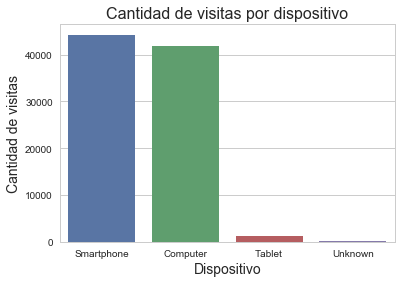

In [7]:
g1 = sns.countplot(x = "device_type", data = df_visited_site)
g1.set_xlabel("Dispositivo", fontsize = 14)
g1.set_ylabel("Cantidad de visitas", fontsize = 14)
g1.set_title("Cantidad de visitas por dispositivo", fontsize = 16)
g1.figure.savefig("CantidadDeAccesosAlSitioWebPorDispositivo.png")

In [8]:
# Guardo las visitas a la pagina que se hicieron mediante smartphone
df_smartphone = df_visited_site[df_visited_site["device_type"] == "Smartphone"]
df_smartphone = df_smartphone.sort_values(by = "timestamp", ascending = True)

#Guardo las visitas a la pagina que se hicieron mediante computadora
df_computer = df_visited_site[df_visited_site["device_type"] == "Computer"]
df_computer = df_computer.sort_values(by = "timestamp", ascending = True)

#Guardo las visitas a la pagina que se hicieron mediante Tablet
df_tablet = df_visited_site[df_visited_site["device_type"] == "Tablet"]
df_tablet = df_tablet.sort_values(by = "timestamp", ascending = True)

In [9]:
print("Visitas mediante smartphone: ", df_smartphone.shape)
print("Visitas mediante computadora: ", df_computer.shape)
print("Visitas mediante tablet: ", df_tablet.shape)

Visitas mediante smartphone:  (44239, 23)
Visitas mediante computadora:  (41790, 23)
Visitas mediante tablet:  (1234, 23)


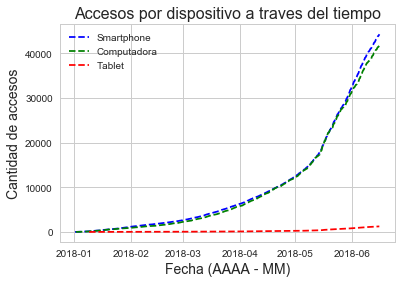

In [47]:
plt.plot(df_smartphone["timestamp"], [i for i in range(len(df_smartphone['timestamp']))], color = "blue", linestyle = "dashed")
plt.plot(df_computer["timestamp"], [i for i in range(len(df_computer["timestamp"]))], color = "green", linestyle = "dashed")
plt.plot(df_tablet["timestamp"], [i for i in range(len(df_tablet["timestamp"]))], color = "red", linestyle = "dashed")
plt.title("Accesos por dispositivo a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de accesos", fontsize = 14)
plt.legend(["Smartphone", "Computadora", "Tablet"])
plt.savefig("AccesosPorDispositivoATravesDelTiempo.png")

In [11]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [13]:
df_conversions = df[df["event"] == "conversion"]

In [14]:
df_conversions['brand'] = df_conversions['model'].str.partition(' ').iloc[:, :1]

C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_conversions.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,brand
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Motorola
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung


In [16]:
df_conversions["brand"].value_counts()

Samsung     641
iPhone      323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: brand, dtype: int64

In [17]:
# Agrupo cada marca en dataframes diferentes
df_conversions_samsung = df_conversions[df_conversions["brand"] == "Samsung"]
df_conversions_iphone = df_conversions[df_conversions["brand"] == "iPhone"]
df_conversions_motorola = df_conversions[df_conversions["brand"] == "Motorola"]

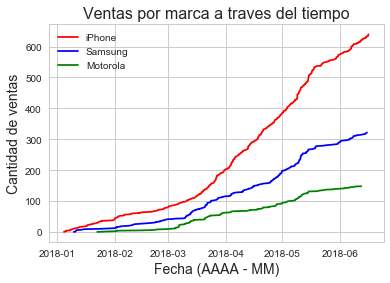

In [18]:
# grafico la evolucion de sus compras en el tiempo
df_conversions_samsung = df_conversions_samsung.sort_values(by = "timestamp", ascending = True)
df_conversions_iphone = df_conversions_iphone.sort_values(by = "timestamp", ascending = True)
df_conversions_motorola = df_conversions_motorola.sort_values(by = "timestamp", ascending = True)

plt.plot(df_conversions_samsung["timestamp"], [i for i in range(len(df_conversions_samsung['timestamp']))], color = "red",)
plt.plot(df_conversions_iphone["timestamp"], [i for i in range(len(df_conversions_iphone['timestamp']))], color = "blue")
plt.plot(df_conversions_motorola["timestamp"], [i for i in range(len(df_conversions_motorola['timestamp']))], color = "green")
plt.title("Ventas por marca a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de ventas", fontsize = 14)
plt.legend(["iPhone", "Samsung", "Motorola"])
plt.savefig("VentasPorMarcaATravesDelTiempo.png")

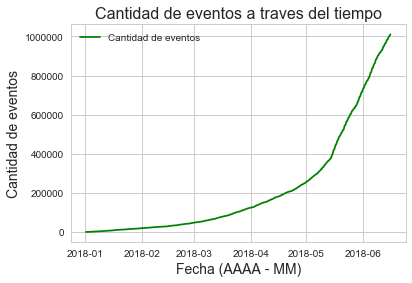

In [19]:
df_tiempo_eventos = df.sort_values(by = "timestamp", ascending = True)
plt.plot(df_tiempo_eventos["timestamp"], [i for i in range(len(df_tiempo_eventos['event']))], color = "green")
plt.title("Cantidad de eventos a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de eventos", fontsize = 14)
plt.legend(["Cantidad de eventos"])
plt.savefig("CantidadDeEventosATravesDelTiempo.png")

In [20]:
# Ahora voy a realizar un analisis de los modelos mas visitados

df["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [21]:
df_visitados = df[df["event"] == "viewed product"]
df_visitados.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2018-05-24 11:27:47,viewed product,000a54b2,NaN,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2018-05-24 11:28:59,viewed product,000a54b2,NaN,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Agrupo los visitados por marca
df_visitados['brand'] = df_visitados['model'].str.partition(' ').iloc[:, :1]

C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df_visitados["brand"].value_counts()

iPhone      242014
Samsung     202648
Motorola     59547
LG            9098
Sony          6782
Lenovo        4483
Asus          2023
iPad          1839
Quantum        497
Name: brand, dtype: int64

In [24]:
# Realizo un analisis temporal de las 2 marcas mas visitadas en funcion del tiempo (ya que son muy superiores)
df_visitados_iphone = df_visitados[df_visitados["brand"] == "iPhone"]
df_visitados_samsung = df_visitados[df_visitados["brand"] == "Samsung"]

df_visitados_iphone = df_visitados_iphone.sort_values(by = "timestamp")
df_visitados_samsung = df_visitados_samsung.sort_values(by = "timestamp")

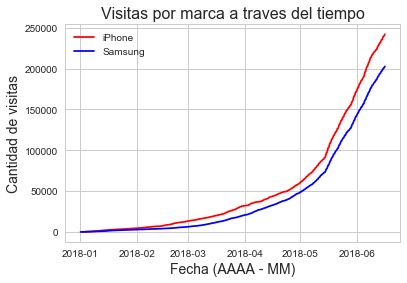

In [25]:
plt.plot(df_visitados_iphone["timestamp"],[i for i in range(len(df_visitados_iphone["timestamp"]))], color = "red")
plt.plot(df_visitados_samsung["timestamp"], [i for i in range(len(df_visitados_samsung["timestamp"]))], color = "blue")
plt.title("Visitas por marca a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de visitas", fontsize = 14)
plt.legend(["iPhone", "Samsung"])
plt.savefig("VisitasPorMarcaATravesDelTiempo.png")

In [26]:
# Analisis de los eventos "lead" (cuando el usuario pide que le llegue una notificacion para la aparicion
# en stock de un modelo que en el momento no estaba disponible)
df_leads = df[df["event"] == "lead"]
df_leads.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
3248,2018-04-17 22:11:19,lead,01139919,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6636,2018-04-07 11:37:11,lead,01bca043,NaN,NaN,iPhone 6 Plus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7036,2018-02-12 17:23:30,lead,01db2fe6,NaN,NaN,Samsung Galaxy J5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13041,2018-03-08 12:39:30,lead,03767f8e,NaN,NaN,iPhone 6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14203,2018-01-08 14:04:07,lead,03bdcd81,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


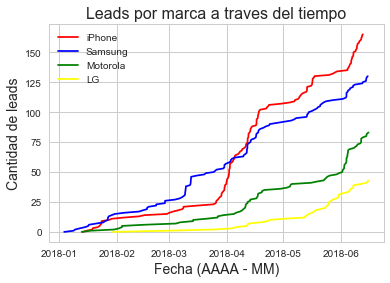

In [27]:
df_leads['brand'] = df_leads['model'].str.partition(' ').iloc[:, :1]

# Agrupo los modelos por las marcas: iPhone, Samsung, Motorola y LG

df_leads_iphone = df_leads[df_leads["brand"] == "iPhone"]
df_leads_iphone = df_leads_iphone.sort_values(by = "timestamp", ascending = True)

df_leads_samsung = df_leads[df_leads["brand"] == "Samsung"]
df_leads_samsung = df_leads_samsung.sort_values(by = "timestamp", ascending = True)

df_leads_motorola = df_leads[df_leads["brand"] == "Motorola"]
df_leads_motorola = df_leads_motorola.sort_values(by = "timestamp", ascending = True)

df_leads_lg = df_leads[df_leads["brand"] == "LG"]
df_leads_lg = df_leads_lg.sort_values(by = "timestamp", ascending = True)

plt.plot(df_leads_iphone["timestamp"], [i for i in range(len(df_leads_iphone["timestamp"]))], color = "red")
plt.plot(df_leads_samsung["timestamp"], [i for i in range(len(df_leads_samsung["timestamp"]))], color = "blue")
plt.plot(df_leads_motorola["timestamp"], [i for i in range(len(df_leads_motorola["timestamp"]))], color = "green")
plt.plot(df_leads_lg["timestamp"], [i for i in range(len(df_leads_lg["timestamp"]))], color = "yellow")
plt.title("Leads por marca a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de leads", fontsize = 14)
plt.legend(["iPhone", "Samsung", "Motorola", "LG"])
plt.savefig("LeadsPorMarcaATravesDelTiempo.png")

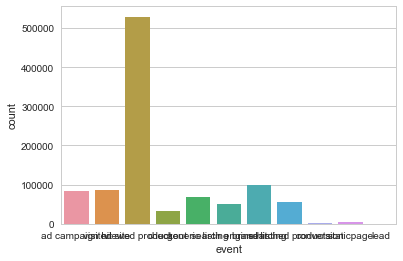

In [28]:
g1 = sns.countplot("event", data = df)

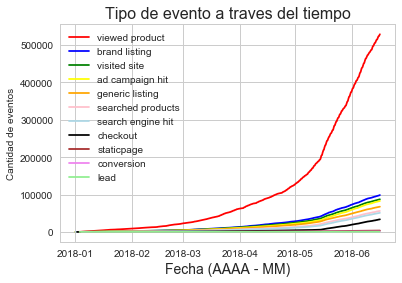

In [50]:
# Quiero graficar a traves del tiempo la cantidad de cada tipo de eventos
df_viewed_product = df[df["event"] == "viewed product"].sort_values(by = "timestamp", ascending = True)
df_brand_listing = df[df["event"] == "brand listing"].sort_values(by = "timestamp", ascending = True)
df_visited_site = df[df["event"] == "visited site"].sort_values(by = "timestamp", ascending = True)
df_ad_campaign_hit = df[df["event"] == "ad campaign hit"].sort_values(by = "timestamp", ascending = True)
df_generic_listing = df[df["event"] == "generic listing"].sort_values(by = "timestamp", ascending = True)
df_searched_products = df[df["event"] == "searched products"].sort_values(by = "timestamp", ascending = True)
df_search_engine_hit = df[df["event"] == "search engine hit"].sort_values(by = "timestamp", ascending = True)
df_checkout = df[df["event"] == "checkout"].sort_values(by = "timestamp", ascending = True)
df_staticpage = df[df["event"] == "staticpage"].sort_values(by = "timestamp", ascending = True)
df_conversion = df[df["event"] == "conversion"].sort_values(by = "timestamp", ascending = True)
df_lead = df[df["event"] == "lead"].sort_values(by = "timestamp", ascending = True)

plt.plot(df_viewed_product["timestamp"], [i for i in range(len(df_viewed_product["timestamp"]))], color = "red")
plt.plot(df_brand_listing["timestamp"], [i for i in range(len(df_brand_listing["timestamp"]))], color = "blue")
plt.plot(df_visited_site["timestamp"], [i for i in range(len(df_visited_site["timestamp"]))], color = "green")
plt.plot(df_ad_campaign_hit["timestamp"], [i for i in range(len(df_ad_campaign_hit["timestamp"]))], color = "yellow")
plt.plot(df_generic_listing["timestamp"], [i for i in range(len(df_generic_listing["timestamp"]))], color = "orange")
plt.plot(df_searched_products["timestamp"], [i for i in range(len(df_searched_products["timestamp"]))], color = "pink")
plt.plot(df_search_engine_hit["timestamp"], [i for i in range(len(df_search_engine_hit["timestamp"]))], color = "lightblue")
plt.plot(df_checkout["timestamp"], [i for i in range(len(df_checkout["timestamp"]))], color = "black")
plt.plot(df_staticpage["timestamp"], [i for i in range(len(df_staticpage["timestamp"]))], color = "brown")
plt.plot(df_conversion["timestamp"], [i for i in range(len(df_conversion["timestamp"]))], color = "violet")
plt.plot(df_lead["timestamp"], [i for i in range(len(df_lead["timestamp"]))], color = "lightgreen")
plt.title("Tipo de evento a traves del tiempo", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de eventos", fontsize = 10)
plt.legend(["viewed product", "brand listing", "visited site", "ad campaign hit", "generic listing", "searched products", "search engine hit", "checkout", "staticpage", "conversion", "lead"])
plt.savefig("TipoDeEventoATravesDelTiempo.png")

In [30]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df["new_vs_returning"].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [36]:
df_new_vs_returning = df[df["new_vs_returning"].notnull()]
df_new_vs_returning["event"].value_counts()

visited site    87378
Name: event, dtype: int64

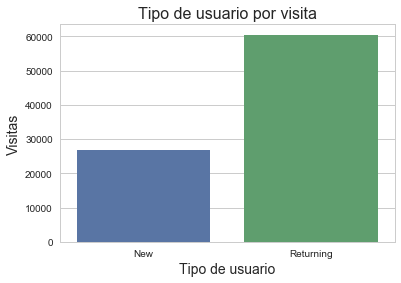

In [40]:
g1 = sns.countplot("new_vs_returning", data = df_new_vs_returning)
g1.set_title("Tipo de usuario por visita", fontsize = 16)
g1.set_xlabel("Tipo de usuario", fontsize = 14)
g1.set_ylabel("Visitas", fontsize = 14)
g1.figure.savefig("TipoDeUsuarioPorVisita.png")

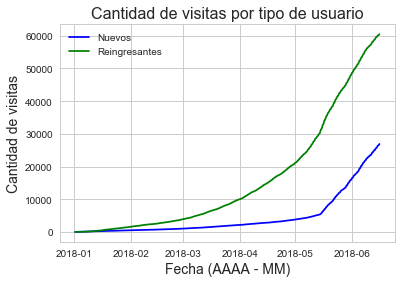

In [46]:
df_new = df_new_vs_returning[df_new_vs_returning["new_vs_returning"] == "New"].sort_values(by = "timestamp", ascending = True)
df_returning = df_new_vs_returning[df_new_vs_returning["new_vs_returning"] == "Returning"].sort_values(by = "timestamp", ascending = True)

plt.plot(df_new["timestamp"], [i for i in range(len(df_new["timestamp"]))], color = "blue")
plt.plot(df_returning["timestamp"], [i for i in range(len(df_returning["timestamp"]))], color = "green")
plt.title("Cantidad de visitas por tipo de usuario", fontsize = 16)
plt.xlabel("Fecha (AAAA - MM)", fontsize = 14)
plt.ylabel("Cantidad de visitas", fontsize = 14)
plt.legend(["Nuevos", "Reingresantes"])
plt.savefig("CantidadDeVisitasPorTipoDeUsuario.png")